<a href="https://colab.research.google.com/github/siribafna/Myocardial-Infarction-Predictions/blob/main/vaishnavi-feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import io
import pandas as pd
import numpy as np





In [13]:
from google.colab import files
uploaded = files.upload()

Saving MI-cleaned-TT.csv to MI-cleaned-TT (1).csv


### preprocess




In [4]:
io.StringIO(uploaded["MI-cleaned-TT.csv"].decode("utf-8"))
data = pd.read_csv(io.StringIO(uploaded["MI-cleaned-TT.csv"].decode("utf-8")))
data.describe()
data.dtypes

ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 117, dtype: object

In [5]:
data.isna().sum()

ID           0
AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 117, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value=np.nan, strategy='most_frequent')
X = imputer.fit_transform(data)

X = pd.DataFrame(X, columns=data.columns)

print(X)




          ID   "AGE"   "SEX"  ...   "REC_IM"   "P_IM_STEN"   "LET_IS"
0        1.0    77.0     1.0  ...        0.0           0.0        0.0
1        2.0    55.0     1.0  ...        0.0           0.0        0.0
2        3.0    52.0     1.0  ...        0.0           0.0        0.0
3        4.0    68.0     0.0  ...        0.0           0.0        0.0
4        5.0    60.0     1.0  ...        0.0           0.0        0.0
...      ...     ...     ...  ...        ...           ...        ...
1695  1696.0    77.0     0.0  ...        0.0           0.0        3.0
1696  1697.0    70.0     0.0  ...        0.0           0.0        1.0
1697  1698.0    55.0     1.0  ...        1.0           0.0        6.0
1698  1699.0    79.0     0.0  ...        0.0           0.0        1.0
1699  1700.0    63.0     1.0  ...        0.0           0.0        1.0

[1700 rows x 124 columns]


In [ ]:
X.isna().sum()

ID              0
 "AGE"          0
 "SEX"          0
 "INF_ANAM"     0
 "STENOK_AN"    0
               ..
 "DRESSLER"     0
 "ZSN"          0
 "REC_IM"       0
 "P_IM_STEN"    0
 "LET_IS"       0
Length: 124, dtype: int64

In [ ]:


# remove special character
X.columns = X.columns.str.replace('"', '')

X

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,CHD,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr11,nr01,nr02,nr03,nr04,nr07,nr08,np01,np04,np05,np07,np08,np09,np10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,...,GIPER_Na,Na_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1.0,77.0,1.0,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,80.0,180.0,100.0,0.0,0.0,...,0.0,138.0,0.15,0.15,1.2,8.0,16.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,80.0,120.0,90.0,0.0,0.0,...,0.0,132.0,0.38,0.18,1.2,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,52.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,...,0.0,132.0,0.30,0.11,1.2,10.8,5.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,68.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140.0,80.0,120.0,70.0,0.0,0.0,...,0.0,146.0,0.75,0.37,1.2,6.9,5.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,60.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,...,0.0,132.0,0.45,0.22,1.2,8.3,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696.0,77.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,80.0,110.0,70.0,0.0,0.0,...,0.0,130.0,1.05,0.52,1.2,12.8,6.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
1696,1697.0,70.0,0.0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,140.0,80.0,50.0,0.0,0.0,1.0,...,0.0,136.0,0.15,0.15,1.2,6.9,5.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1697,1698.0,55.0,1.0,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,80.0,70.0,50.0,0.0,0.0,...,0.0,136.0,0.23,0.15,1.2,8.3,13.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
1698,1699.0,79.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,80.0,110.0,70.0,0.0,0.0,...,0.0,136.0,0.45,0.45,1.2,7.5,4.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.

Categorical variables

In [6]:
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,CHD,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1692,62.0,1,0.0,0.0,0.0,0.0,0.0,1.0,7.0,...,0,0,0,0,1,0,0,0,0,3
1504,1693,71.0,0,0.0,6.0,2.0,2.0,2.0,0.0,7.0,...,0,0,0,0,1,0,0,1,0,3
1505,1695,77.0,0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,0,0,0,0,1,0,0,0,0,3
1506,1696,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,...,0,0,1,0,1,0,0,0,0,3


In [ ]:
#label encoder
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()

l1.fit(X['LET_IS'])

X.LET_IS = l1.transform(X.LET_IS)

print(X)



KeyError: ignored

In [ ]:
#encoding for Lethal outcome variable to determine the reason for death
data = pd.get_dummies(data, columns = ['LET_IS'])

KeyError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


KeyboardInterrupt: ignored

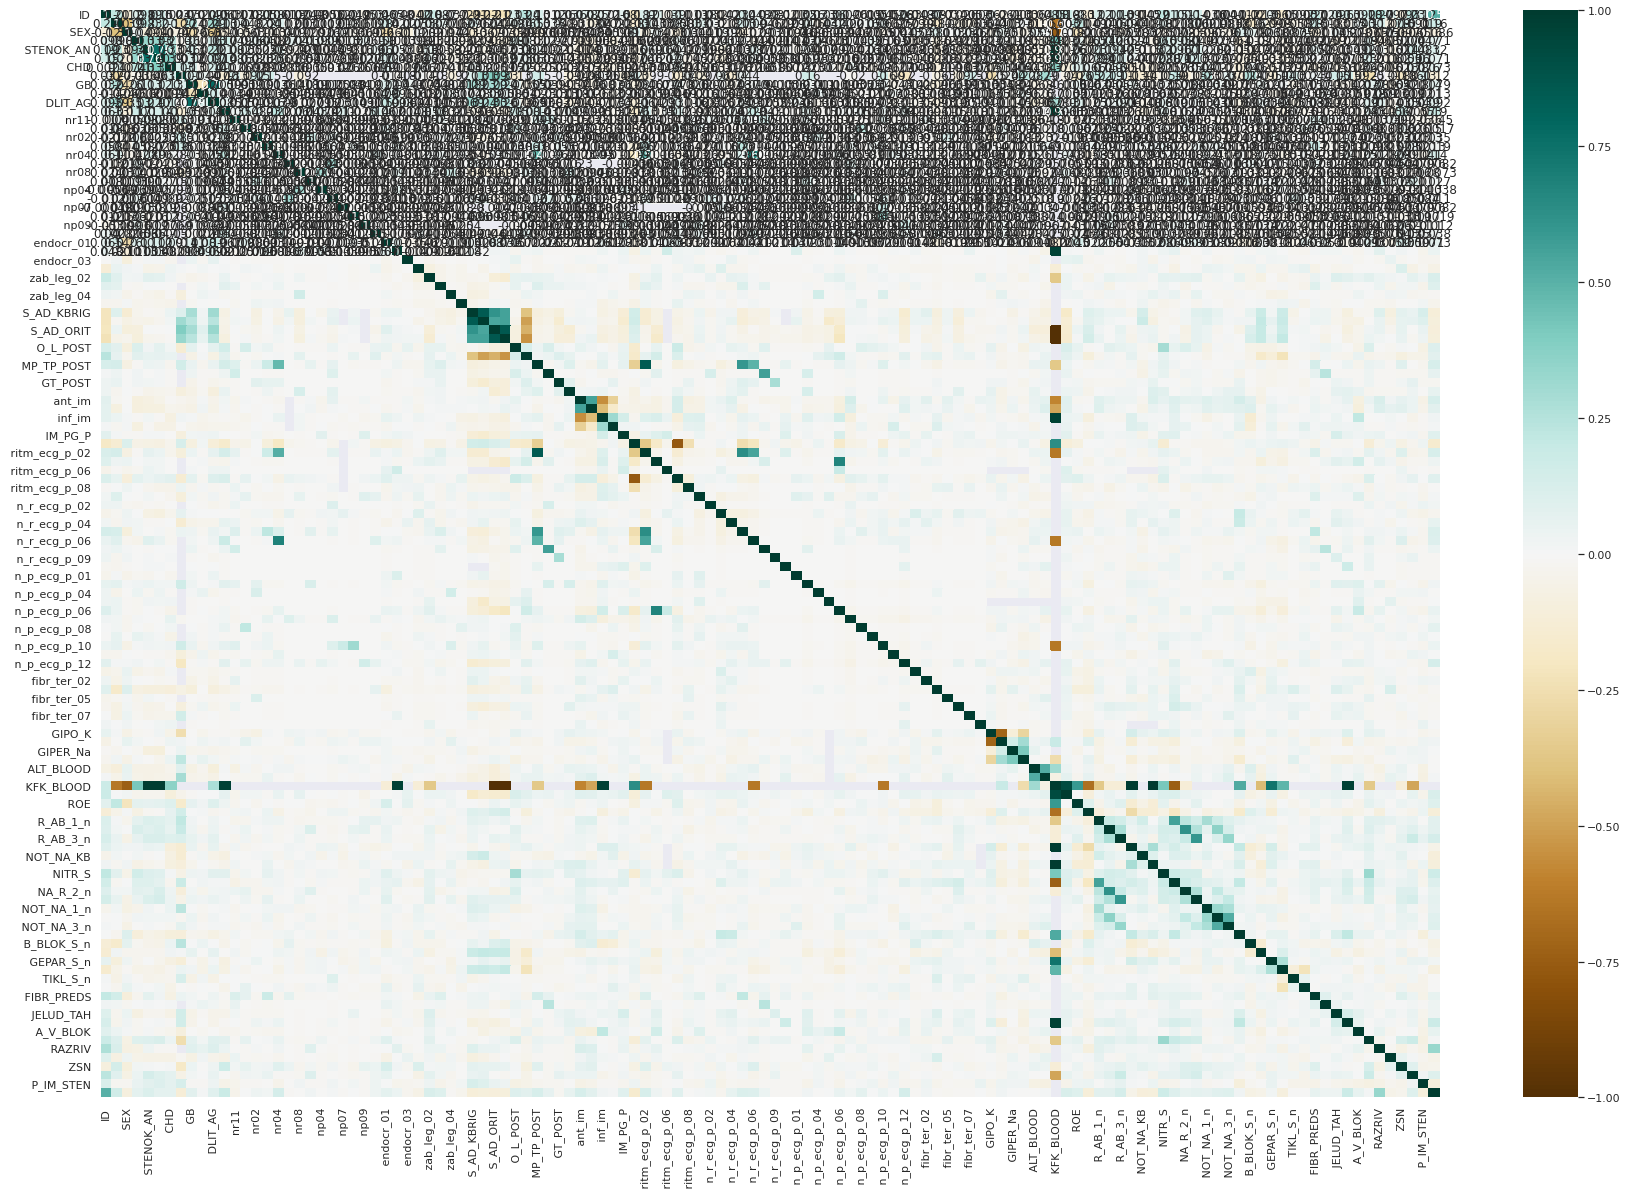

In [ ]:
plt.figure(figsize=(30,20))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
# patients by gender
import plotly.offline as pyo
labels = data['SEX'].value_counts().index
values = data['SEX'].value_counts().values

colors = ['#eba796', '#96ebda']

fig = {'data' : [{'type' : 'pie',
                  'name' : "Patients by Gender: Pie chart",
                 'labels' : data['SEX'].value_counts().index,
                 'values' : data['SEX'].value_counts().values,
                 'direction' : 'clockwise',
                 'marker' : {'colors' : ['#9cc359', '#e96b5c']}}], 'layout' : {'title' : 'Patients by Gender'}}

pyo.iplot(fig)


In [ ]:
# Patient age range
import plotly.graph_objs as go
x0 = data["AGE"].values

trace0 = go.Box(x=x0, name = 'Age',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    ))
data = [trace0]
pyo.iplot(data)

In [ ]:
# LET_IS out come

#data.columns = data.columns.str.strip()
#data.columns.values

#plot the scatter plot of balance and salary variable in data
plt.scatter(data.AGE,data.LET_IS)
plt.show()


AttributeError: ignored

In [ ]:
sns.distplot(data['IBS_POST'],kde=False,bins=30,color='violet')



TypeError: ignored

[0.01012779 0.00783081 0.00924939 0.00633941 0.01556581 0.01810852
 0.00760206 0.01061298 0.00948468 0.01438105 0.0049429  0.
 0.         0.00329515 0.01104786 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01031263 0.0098782  0.         0.00302904 0.00733509 0.01253284
 0.         0.         0.0121759  0.01704901 0.00919577 0.17365846
 0.01132709 0.00602384 0.         0.         0.00909116 0.00731148
 0.01040228 0.0042077  0.00995911 0.0185677  0.01422069 0.
 0.         0.01365692 0.         0.0075258  0.         0.00685151
 0.01249    0.00519883 0.01880734 0.         0.         0.
 0.         0.         0.         0.         0.         0.00711743
 0.         0.         0.         0.         0.01787469 0.
 0.         0.         0.         0.         0.         0.
 0.00558647 0.00821463 0.         0.00613326 0.00715475 0.00890787
 0.01032871 0.00795662 0.00873533 0.00731171 0.00646056 0.0114164
 0.01637313 0.01841299 0.00686393 0.00745935 0.00902

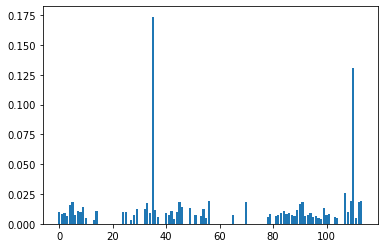

In [16]:
#Feauture Importance


# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# split data into X and y
X = data.iloc[:, 1:115]
y = data.iloc[:, 116]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


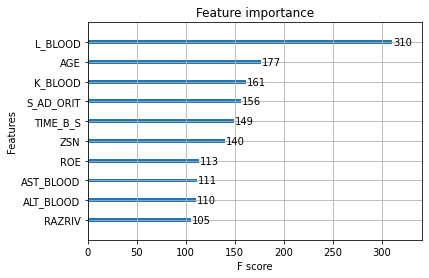

In [17]:
import numpy as np


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed=0
test_size=0.30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=seed)
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
import matplotlib.pylab as plt
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(model, max_num_features=10) # top 10 most important features
plt.show()

In [35]:
#forward regression

# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



ModuleNotFoundError: ignored